#### imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train_s3TEQDk.csv")

In [3]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
df.shape

(245725, 11)

In [5]:
df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [6]:
df["Credit_Product"].fillna("unknown", inplace = True) 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       245725 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [8]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


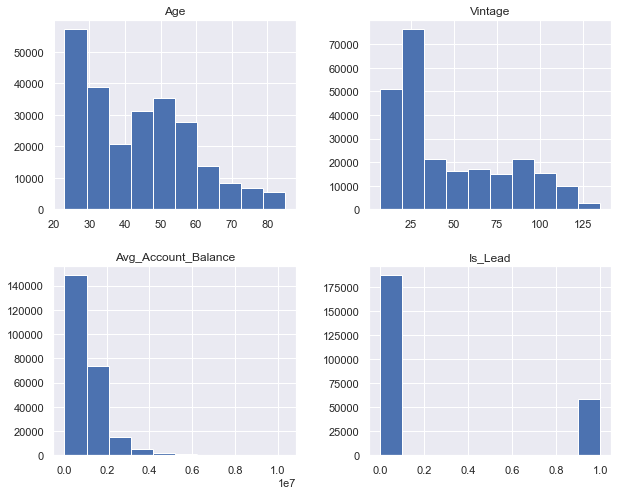

In [9]:
sns.set(font_scale = 1)
df.hist(figsize=(10,8))
plt.show()

In [7]:
cat_col=[]
for col in df.columns:
    if df[col].dtype in ["object"]:
        cat_col.append(col)

In [8]:
cat_col.remove("ID")

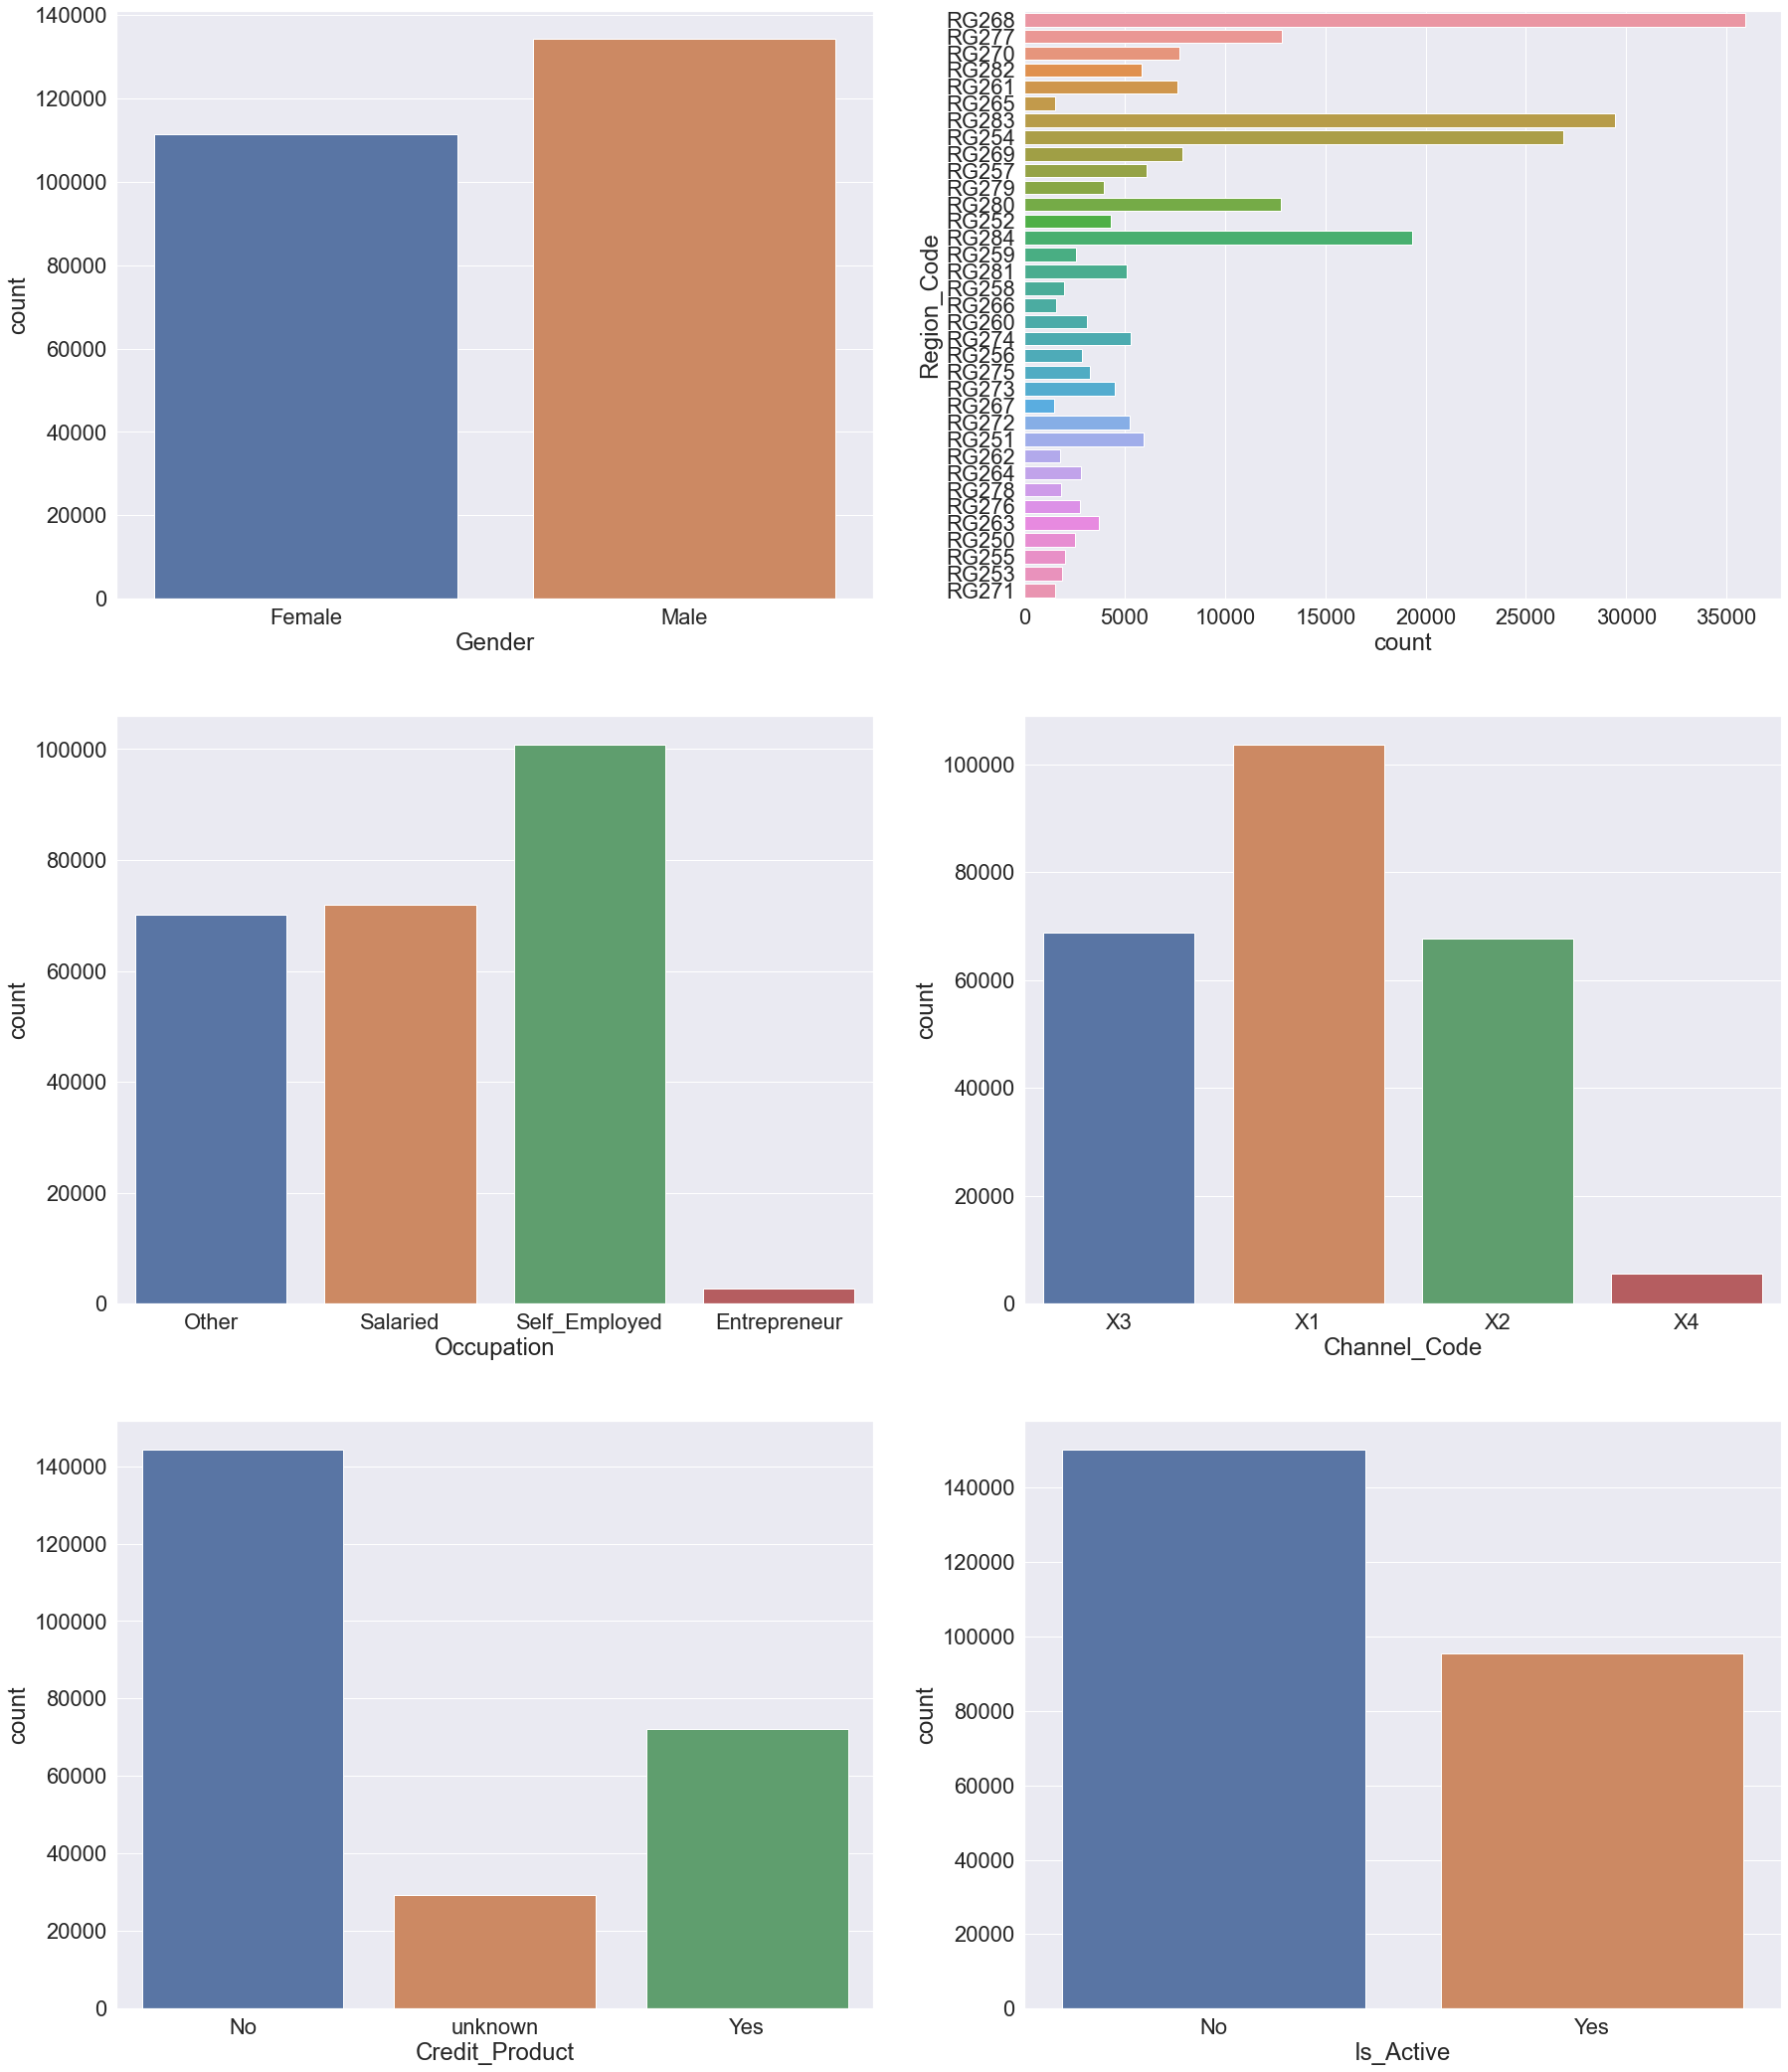

In [11]:
sns.set(font_scale = 2)
plt.figure(figsize=(30,50))
for i,col in enumerate(cat_col):
    if col!="Region_Code":
        plt.subplot(4,2,i+1)
        sns.countplot(x=col,data=df)
    else:
        plt.subplot(4,2,i+1)
        sns.countplot(y=col,data=df)
    

## Box Plots

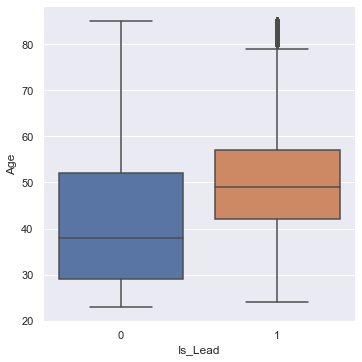

In [12]:
sns.set(font_scale = 1)
sns.catplot(x='Is_Lead',y='Age',data=df,kind='box')

###  Inference

- Age with 43-56 - Is_lead = 1 
- Age with 28-52 - IS_LEad = 0
- Age below 42 - less chance of lead
- Can see outlier in Age > 78

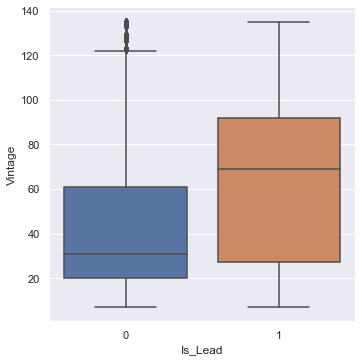

In [13]:
sns.catplot(x='Is_Lead',y='Vintage',data=df,kind='box')

### Inference

- 25-90 months : High chances of Lead
- 20-60 months : Not a lead
- Higher the vintage, higher chance of being a lead

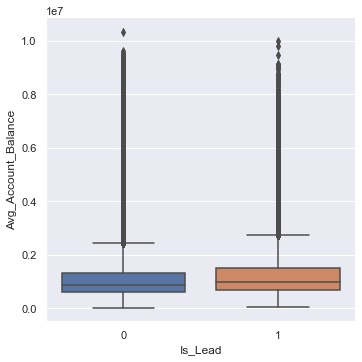

In [14]:
sns.catplot(x='Is_Lead',y='Avg_Account_Balance',data=df,kind='box')

- there are lot of outliers
- Average account balance doesn't look to be a good distinguisher for predicting whether someone will be lead or not as median and IQR range is close for both the classes

## Percent and count plots

In [15]:
sns.set(font_scale = 1)

In [10]:
region_count = pd.crosstab(index=df["Region_Code"], 
                          columns=df["Is_Lead"])
region_percent = pd.crosstab(index=df["Region_Code"], 
                          columns=df["Is_Lead"]).apply(lambda r: r/r.sum(), axis=1)

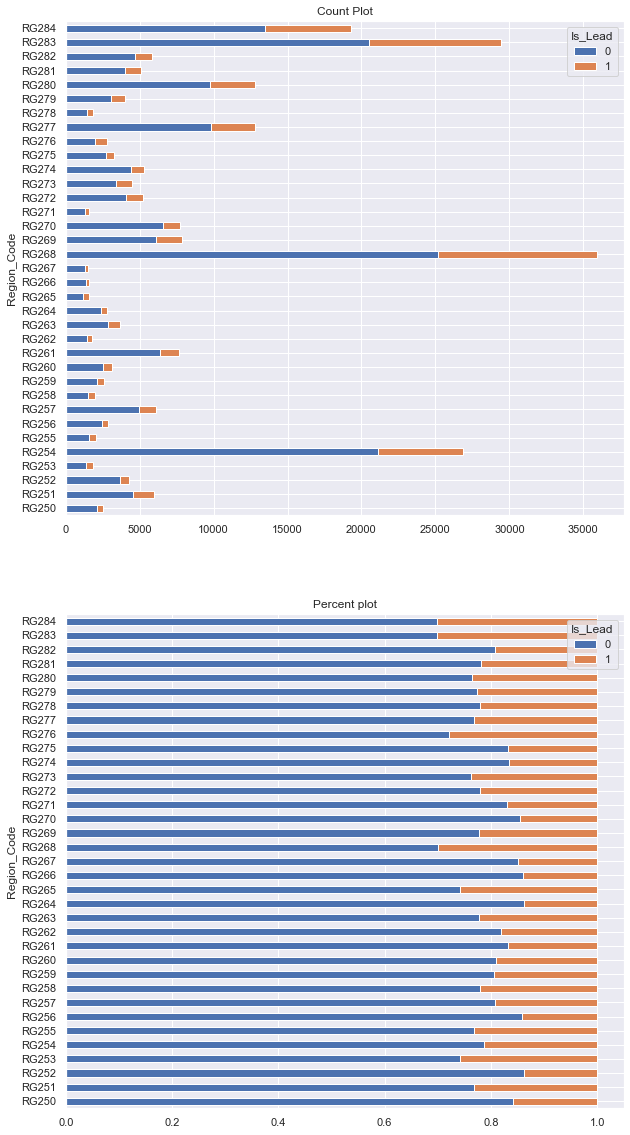

In [17]:
fig, axes = plt.subplots(nrows=2,ncols=1,figsize=(10,20))
region_count.plot(kind="barh",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)

region_percent.plot(kind="barh",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

#### Occupation

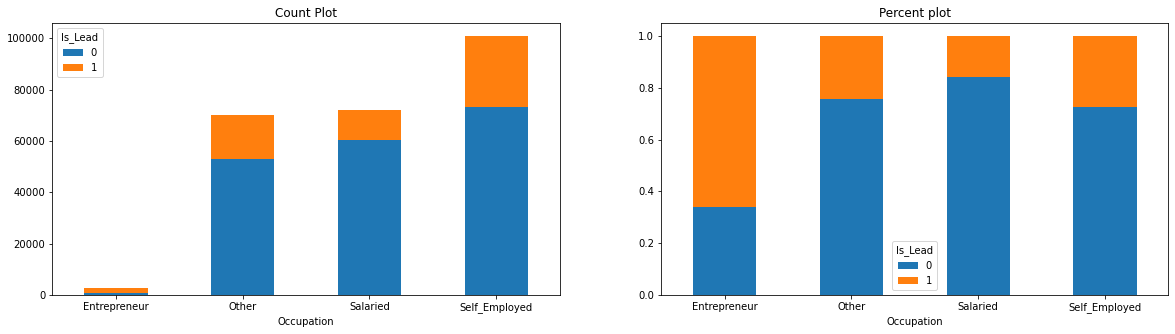

In [11]:
occupation_count = pd.crosstab(index=df["Occupation"], 
                          columns=df["Is_Lead"])
occupation_percent = pd.crosstab(index=df["Occupation"], 
                          columns=df["Is_Lead"]).apply(lambda r: r/r.sum(), axis=1)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
occupation_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)

occupation_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

- Entrepreneurs are best prospects of being leads
- Self Employed people are better prospects of being a lead than Salaried people

#### Gender

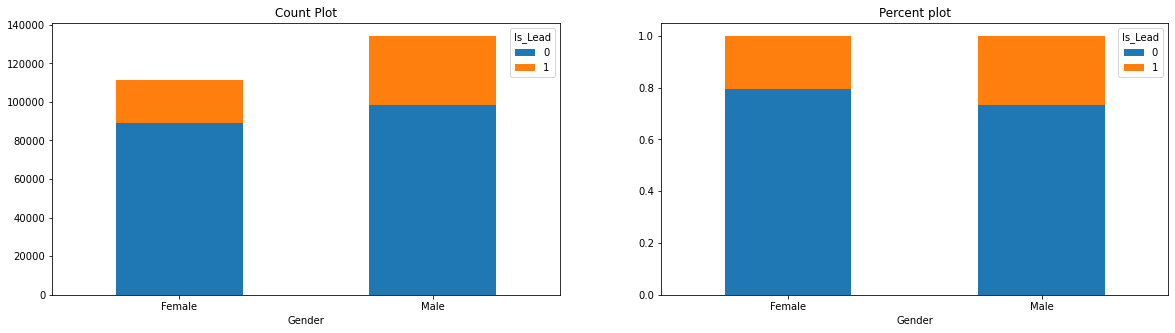

In [12]:
gender_count = pd.crosstab(index=df["Gender"], 
                          columns=df["Is_Lead"])
gender_percent = pd.crosstab(index=df["Gender"], 
                          columns=df["Is_Lead"]).apply(lambda r: r/r.sum(), axis=1)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
gender_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)

gender_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

- men looks to be slightly better prospects of being a lead as compared to females.

#### Credit Product

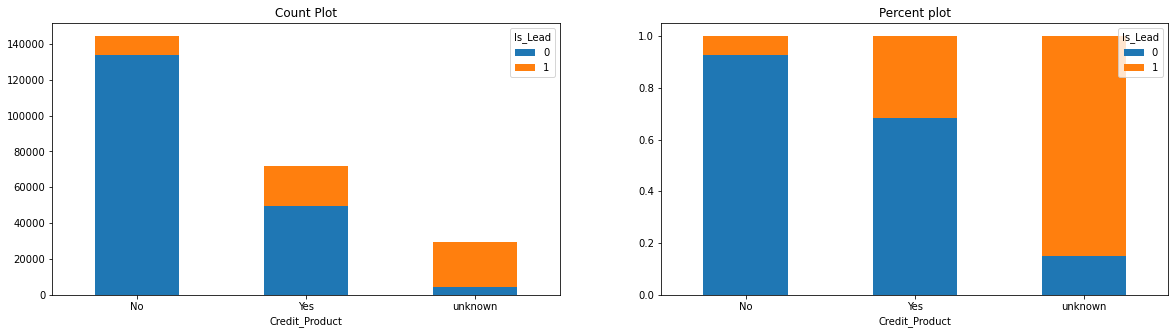

In [13]:
credit_product_count = pd.crosstab(index=df["Credit_Product"], 
                          columns=df["Is_Lead"])
credit_product_percent = pd.crosstab(index=df["Credit_Product"], 
                          columns=df["Is_Lead"]).apply(lambda r: r/r.sum(), axis=1)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
credit_product_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)

credit_product_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

- People who owes credit product looks to be better prospects of being a lead as compared to people who dont owe any credit product , when we dint know whether they owe or dont owe, we can see that they were found to be leads quite offen.

#### Channel Code

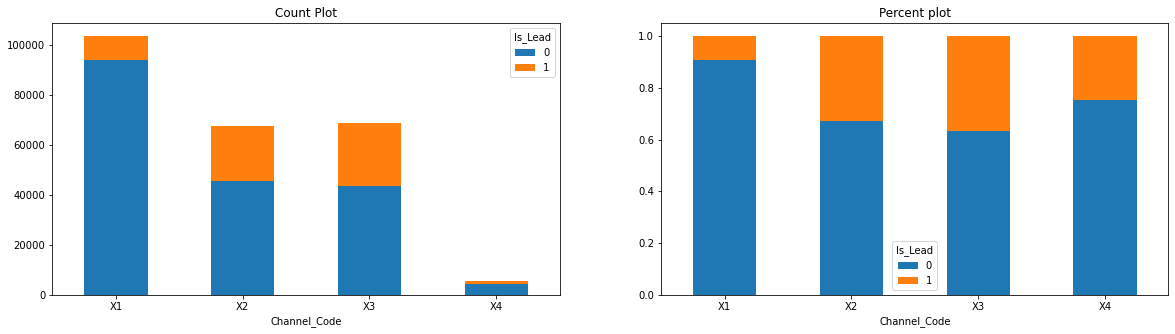

In [14]:
channel_code_count = pd.crosstab(index=df["Channel_Code"], 
                          columns=df["Is_Lead"])
channel_code_percent = pd.crosstab(index=df["Channel_Code"], 
                          columns=df["Is_Lead"]).apply(lambda r: r/r.sum(), axis=1)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
channel_code_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)

channel_code_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

- people who came from channel code X2 and X3 are better prospects of being a lead

#### Is_Active

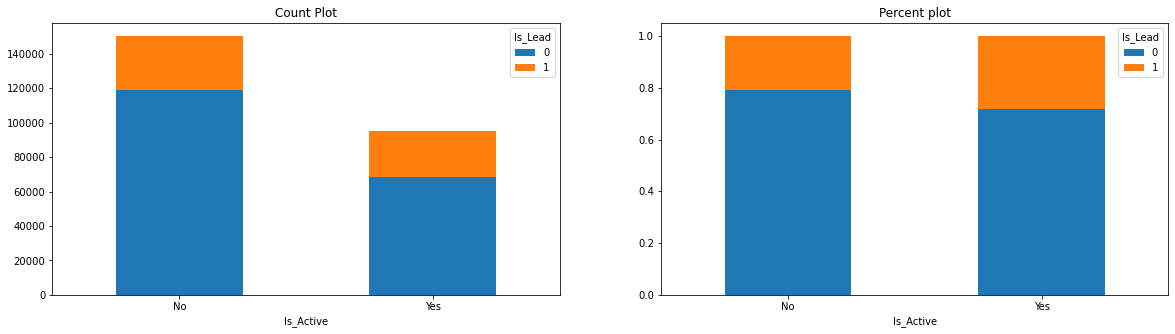

In [15]:
is_active_count = pd.crosstab(index=df["Is_Active"], 
                          columns=df["Is_Lead"])
is_active_percent = pd.crosstab(index=df["Is_Active"], 
                          columns=df["Is_Lead"]).apply(lambda r: r/r.sum(), axis=1)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
is_active_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)

is_active_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

- A active customer is a better prospect of being a lead

 ## Feature Creation and Engineering

#### Region code

In [16]:
# Splitting Regions based on threshold
best_region=region_percent[region_percent[1]>0.25]
good_region=region_percent.loc[(region_percent[1]>0.20) & (region_percent[1]<=0.25)]
average_region=region_percent.loc[(region_percent[1]>0.15) & (region_percent[1]<=0.20)]
poor_region=region_percent[region_percent[1]<=0.15]

In [17]:
# Extracting the names of regions in a list
best_region=list(best_region.index)
good_region=list(good_region.index)
average_region=list(average_region.index)
poor_region=list(poor_region.index)

In [18]:
# Creating Feature
def feature_creation(val):
    if val in best_region:
        return 4
    elif val in good_region:
        return 3
    elif val in average_region:
        return 2
    else:
        return 1

In [19]:
df["regions_priority"]=df["Region_Code"].map(feature_creation)  

#### Age

In [20]:
df['age_bin'] = np.where((df.Age>40)&(df.Age<65),1,0)

#### Vintage

In [21]:
df['Vintage'].describe()

count    245725.000000
mean         46.959141
std          32.353136
min           7.000000
25%          20.000000
50%          32.000000
75%          73.000000
max         135.000000
Name: Vintage, dtype: float64

In [22]:
bins = [0, 20, 40, 60, 136]
labels =[1,2,3,4]
df['binned_vintage'] = pd.cut(df['Vintage'], bins,labels=labels).astype("int")

### EDA on newly created features

#### Age Bin

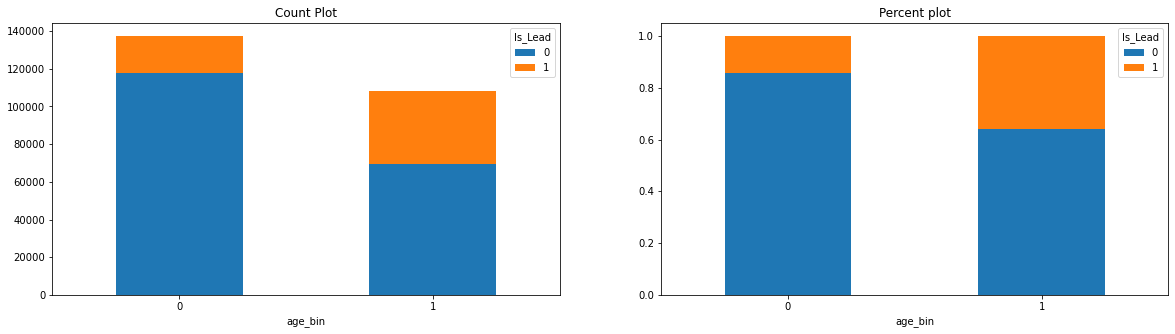

In [23]:
age_bin_count = pd.crosstab(index=df["age_bin"], 
                          columns=df["Is_Lead"])
age_bin_percent = pd.crosstab(index=df["age_bin"], 
                          columns=df["Is_Lead"]).apply(lambda r: r/r.sum(), axis=1)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
age_bin_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)

age_bin_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

#### binned_vintage

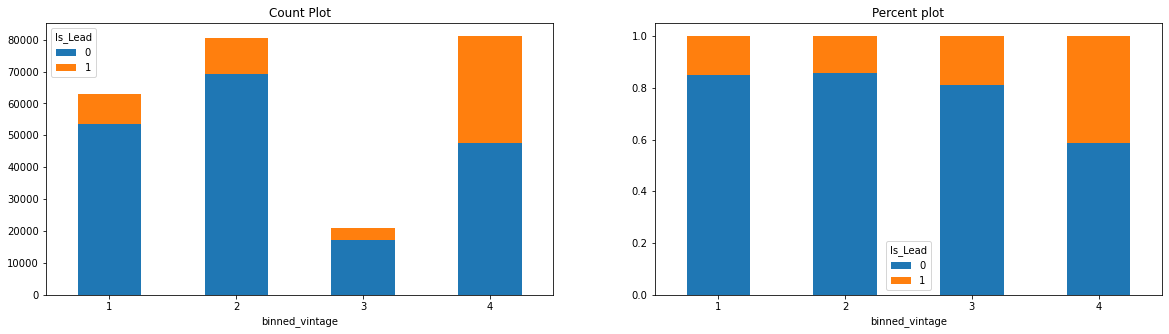

In [24]:
binned_vintage_count = pd.crosstab(index=df["binned_vintage"], 
                          columns=df["Is_Lead"])
binned_vintage_percent = pd.crosstab(index=df["binned_vintage"], 
                          columns=df["Is_Lead"]).apply(lambda r: r/r.sum(), axis=1)

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
binned_vintage_count.plot(kind="bar",
         stacked=True,ax=axes[0],title="Count Plot",rot=0)

binned_vintage_percent.plot(kind="bar",
             stacked=True,ax=axes[1], title="Percent plot",rot=0)
plt.xticks(rotation=0)

plt.show()

#### Label Encoding


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
for columns in cat_col:
    if(columns!="ID"):
        df[columns] = le.fit_transform(df[columns])

In [27]:
df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,regions_priority,age_bin,binned_vintage
0,NNVBBKZB,0,73,18,1,2,43,0,1045696,0,0,4,0,3
1,IDD62UNG,0,30,27,2,0,32,0,581988,0,0,3,0,2
2,HD3DSEMC,0,56,18,3,2,26,0,1484315,1,0,4,1,2
3,BF3NC7KV,1,34,20,2,0,19,0,470454,0,0,1,0,1
4,TEASRWXV,0,30,32,2,0,33,0,886787,0,0,2,0,2


In [28]:
df.drop(["ID"],axis=1,inplace=True)

In [29]:
X=df.drop(["Is_Lead"],axis=1)
y=df["Is_Lead"]

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=8125)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train,random_state=8125)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss, f1_score, recall_score, precision_score, roc_auc_score, plot_confusion_matrix
import optuna
from sklearn.model_selection import StratifiedKFold

In [109]:
def objective(trial):
 
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 90, 130),
        "criterion":trial.suggest_categorical("criterion",["gini","entropy"]),
        'class_weight':'balanced',
        'n_jobs':-1,
        'random_state':3,
        "bootstrap":True,
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 90),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 70),
        'max_features': trial.suggest_uniform('max_features', 0.3, 1.0),
        'max_samples': trial.suggest_uniform('max_samples', 0.3, 1.0),
    }

    rf = RandomForestClassifier(**param) 
#     kfcv=StratifiedKFold(n_splits=10,shuffle=True,random_state=10)
    score = cross_val_score(rf, X_train, y_train,scoring="average_precision",n_jobs=-1, cv=10)
    meanf1 = score.mean()
    return meanf1

study_rf1 = optuna.create_study(direction='maximize')
study_rf1.optimize(objective, n_trials=20)

In [33]:
# average_precision
rf_best_params={'n_estimators': 90, 'criterion': 'gini', 'min_samples_split': 88, 'min_samples_leaf': 28, 'max_features': 0.9664461008845897, 'max_samples': 0.9685832664183156}

In [34]:
rf1 = RandomForestClassifier(
                            class_weight='balanced',
                            n_jobs=-1,
                            random_state= 3,

                            **rf_best_params)
rf1.fit(X_train.values, y_train.values)

RandomForestClassifier(class_weight='balanced', max_features=0.9664461008845897,
                       max_samples=0.9685832664183156, min_samples_leaf=28,
                       min_samples_split=88, n_estimators=90, n_jobs=-1,
                       random_state=3)

In [35]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

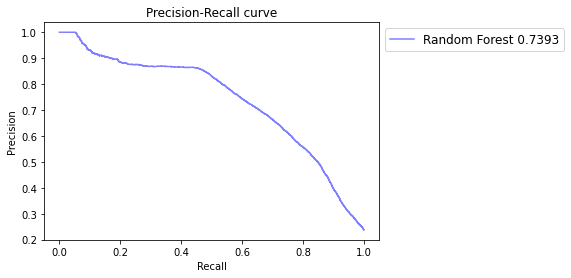

In [36]:
pred_prob = rf1.predict_proba(X_validate)
rf_score = pred_prob[:,1]
average_precision_rf = round(average_precision_score(y_validate, rf_score),4)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_validate, rf_score)
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=1.5,label=f'Random Forest {average_precision_rf}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.show()

In [37]:
feat_imp_rf1=pd.DataFrame({'Feature':X_train.columns, 'Value':rf1.feature_importances_}).sort_values(by='Value', ascending=False)

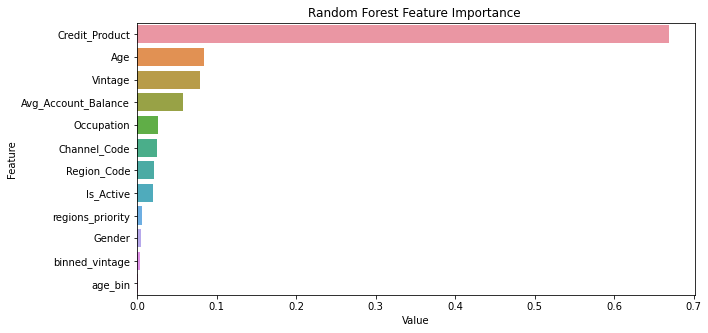

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(feat_imp_rf1["Value"],feat_imp_rf1["Feature"])
plt.title("Random Forest Feature Importance ")
plt.show()

In [39]:
from xgboost import XGBClassifier

In [40]:
from sklearn import metrics

In [108]:
def objective(trial):
    param = {
#         "max_delta_step":1,
        "scale_pos_weight":trial.suggest_categorical("weight",[0.31,3.18,0.35]),
#         "min_child_weight":trial.suggest_categorical("Min_child_weight",[1,2,3,4,5,10]),
#         "grow_policy":trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        "n_estimators":trial.suggest_int("n_estimators",100,130),
        'lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 5.0),
        'alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 10.0),
        "gamma":trial.suggest_loguniform('reg_alpha', 1e-4, 10.0),
        
#         'max_leaves': trial.suggest_int('num_leaves', 2, 255),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.4, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
#          "eval_metric" : "auc",
        "eta":trial.suggest_categorical("eta",[0.3,0.1,0.5]),
        "random_state":3

           }

    xgb = XGBClassifier(**param,verbosity=0)
    
    kfcv=StratifiedKFold(n_splits=10,shuffle=True)
    score = cross_val_score(xgb, X_train, y_train,scoring="average_precision",n_jobs=-1, cv=kfcv)
    meanroc = score.mean()
    return meanroc

studylgb1 = optuna.create_study(direction='maximize')
studylgb1.optimize(objective, n_trials=20)

In [41]:
#best average precision
xgb_best_params={'weight': 0.31, 'n_estimators': 126, 'reg_lambda': 0.004330191554818162, 'reg_alpha': 2.2744408589534326, 'colsample_bytree': 0.9715267329052576, 'subsample': 0.7250794388074453, 'max_depth': 4, 'eta': 0.1}

In [66]:
xgb1 = XGBClassifier(verbosity=0,
                      random_state=3,
#                      max_delta_step=1,
                    **xgb_best_params,
#                      random_state=3
                     )

xgb1.fit(X_train.values, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9715267329052576, eta=0.1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=126, n_jobs=4,
              num_parallel_tree=1, random_state=3, reg_alpha=2.2744408589534326,
              reg_lambda=0.004330191554818162, scale_pos_weight=1,
              subsample=0.7250794388074453, tree_method='exact',
              validate_parameters=1, verbosity=0, weight=0.31)

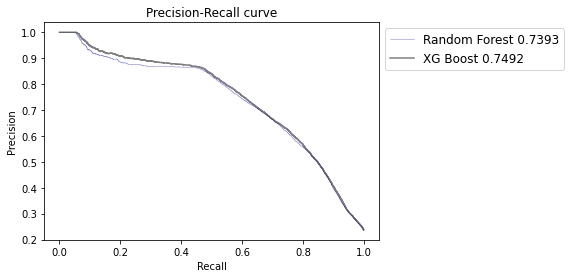

In [67]:
pred_prob = xgb1.predict_proba(X_validate)
xgb1_score = pred_prob[:,1]
average_precision_xgb1 = round(average_precision_score(y_validate, xgb1_score),4)
xgb1_precision, xgb1_recall, xgb1_thresholds = precision_recall_curve(y_validate, xgb1_score)

plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=0.5,label=f'Random Forest {average_precision_rf}')
plt.step(xgb1_recall, xgb1_precision, color='black', alpha=0.5,linewidth=1.5,label=f'XG Boost {average_precision_xgb1}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.show()

#### Trying SMOTE

In [45]:
from imblearn.over_sampling import SMOTE

In [47]:
sm = SMOTE(random_state=4001)

In [49]:
X_train_new, y_train_new = sm.fit_resample(X_train, y_train)

In [53]:
# y_train_new.value_counts()

In [54]:
xgb1_smote = XGBClassifier(verbosity=0,
                      random_state=3,
#                      max_delta_step=1,
                    **xgb_best_params,
#                      random_state=3
                     )

xgb1_smote.fit(X_train_new.values, y_train_new.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9715267329052576, eta=0.1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=126, n_jobs=4,
              num_parallel_tree=1, random_state=3, reg_alpha=2.2744408589534326,
              reg_lambda=0.004330191554818162, scale_pos_weight=1,
              subsample=0.7250794388074453, tree_method='exact',
              validate_parameters=1, verbosity=0, weight=0.31)

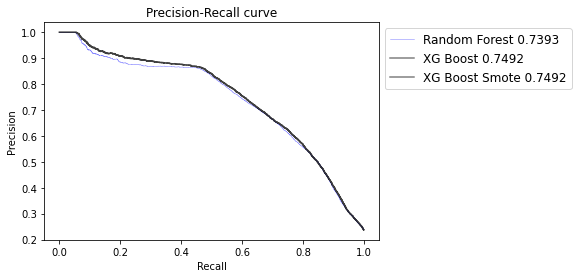

In [57]:
pred_prob_sm = xgb1_smote.predict_proba(X_validate)
xgb1_score_sm = pred_prob[:,1]
average_precision_xgb1_sm = round(average_precision_score(y_validate, xgb1_score_sm),4)

sm_xgb1_precision, sm_xgb1_recall, sm_xgb1_thresholds = precision_recall_curve(y_validate, xgb1_score_sm)
plt.step(rf_recall, rf_precision, color='blue', alpha=0.5,linewidth=0.5,label=f'Random Forest {average_precision_rf}')
plt.step(xgb1_recall, xgb1_precision, color='black', alpha=0.5,linewidth=1.5,label=f'XG Boost {average_precision_xgb1}')
plt.step(sm_xgb1_recall, sm_xgb1_precision, color='black', alpha=0.5,linewidth=1.5,label=f'XG Boost Smote {average_precision_xgb1_sm}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), fontsize = 'large')
plt.show()

SMOTE doesn't improve the results

#### Feature Importance XG-Boost

In [58]:
feat_imp_xgb=pd.DataFrame({'Feature':X_train.columns, 'Value':xgb1.feature_importances_}).sort_values(by='Value', ascending=False)

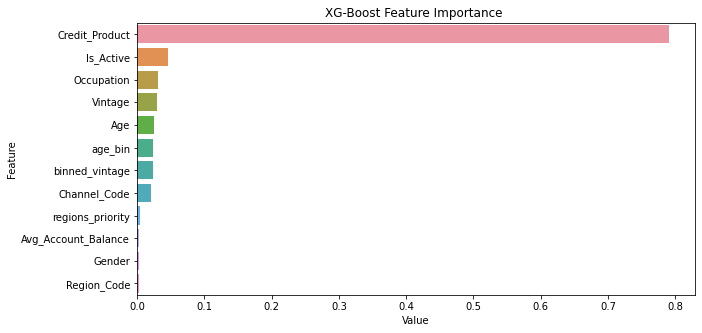

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(feat_imp_xgb["Value"],feat_imp_xgb["Feature"])
plt.title("XG-Boost Feature Importance ")
plt.show()

#### Precision Recall V/s Threshold

(0.0, 1.0)

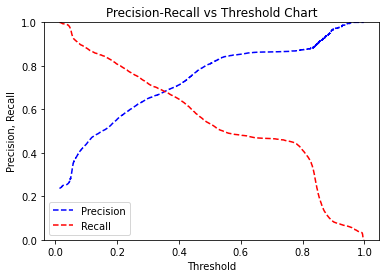

In [68]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(xgb1_thresholds, xgb1_precision[: -1], "b--", label="Precision")
plt.plot(xgb1_thresholds, xgb1_recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1])

#### Best Threshold

In [70]:
f1_score=[]
for prec,rec in zip(xgb1_precision,xgb1_recall):
    f1=((2*prec*rec)/(prec+rec))
    f1_score.append(f1)
max_f1=max(f1_score)
for thresh,f1 in zip(xgb1_thresholds,f1_score):
    if f1==max_f1:
        print(f'best threshold :{thresh} and best f1 =  {f1}')

best threshold :0.297550231218338 and best f1 =  0.6833054329630194


#### making predictions using this Threshold

In [71]:
y_pred=[]
y_pred_xgb = xgb1.predict_proba(X_test.values)[:,1]
for value in y_pred_xgb:
    if value>=0.297550231218338:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred_xgb=np.array(y_pred)

####  classification report

In [72]:
from sklearn.metrics import  roc_curve,roc_auc_score, auc, classification_report
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89     37487
           1       0.65      0.72      0.68     11658

    accuracy                           0.84     49145
   macro avg       0.78      0.80      0.79     49145
weighted avg       0.85      0.84      0.84     49145



In [73]:
import scikitplot as skplt

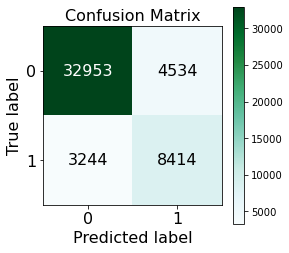

In [74]:
skplt.metrics.plot_confusion_matrix(
    y_test, 
    y_pred_xgb,
    figsize=(4,4),
    title_fontsize='16',
    text_fontsize='16',
    title ='Confusion Matrix',
    cmap='BuGn'
    )
plt.show()

- here, my model is ready. but, this may not be the ultimate solution as strictly labelling customers will be a lead or not is leading to loss of some information , for example person having probablity of being lead as 0.95 is given same importance as customer being lead who has got probablity of say 0.4 , but if we have limited resources then we should first target the customer having maxmum probablity , so we should take their probablity into account instead of strict labels.

#### Lift Analysis

In [76]:
y_pred_prob_xgb = xgb1.predict_proba(X_test.values)[:,1]
pred_bins=pd.DataFrame(index=X_test.index,data={'Actual':y_test,'PredProb':y_pred_prob_xgb})
pred_bins.head()

,Actual,PredProb
73445,0,0.037331
210193,0,0.050960
150931,0,0.102130
144466,0,0.055709
151174,0,0.076396


In [106]:
pred_bins['Probabilty Bins']=pd.cut(x=pred_bins['PredProb'],bins=[i/10 for i in range(11)])
lift=pred_bins.groupby('Probabilty Bins')[['Actual']].mean()
lift['EF']=lift['Actual']/0.2373 #since 23.73% actually dont return # 58288/(187437+58288)
lift = np.round(lift,2)
lift.columns = ['Target_perc', 'Effeciency']
lift = lift.reset_index()
lift['Probabilty Bins'] = lift['Probabilty Bins'].astype(str)
lift['number_of_customers']=pred_bins.groupby(['Probabilty Bins'])[['Actual']].count().values

In [107]:
lift

,Probabilty Bins,Target_perc,Effeciency,number_of_customers
0,"(0.0, 0.1]",0.05,0.22,25774
1,"(0.1, 0.2]",0.14,0.57,6455
2,"(0.2, 0.3]",0.26,1.08,4055
3,"(0.3, 0.4]",0.35,1.49,2347
4,"(0.4, 0.5]",0.45,1.88,2739
5,"(0.5, 0.6]",0.55,2.33,1049
6,"(0.6, 0.7]",0.71,2.99,273
7,"(0.7, 0.8]",0.81,3.43,865
8,"(0.8, 0.9]",0.85,3.57,4560
9,"(0.9, 1.0]",0.96,4.05,1028


#### Lift Chart

In [87]:
import matplotlib

In [88]:
def create_proxy(label):
    line = matplotlib.lines.Line2D([0], [0], linestyle='none', mfc='black',
                mec='none', marker=r'$\mathregular{{{}}}$'.format(label))
    return line

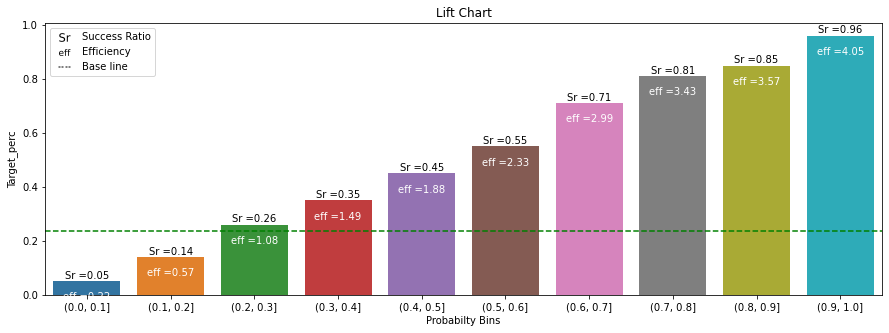

In [89]:
plt.figure(figsize=(15,5))
plt.title('Lift Chart')
labels = ['Sr', 'eff', '----']
proxies = [create_proxy(item) for item in labels]
descriptions = ['Success Ratio', 'Efficiency', 'Base line']
g =sns.barplot(x='Probabilty Bins',y='Target_perc',data=lift)
g.axhline(0.2372,color="green",linestyle ="--",label ='base line')
for index, row in lift.iterrows():
    g.text(row.name,row.Target_perc+0.01,"Sr ="+ str(round(row.Target_perc,2)), color='black', ha="center",label="er")
    g.text(row.name,row.Target_perc-0.07,"eff ="+ str(round(row.Effeciency,2)), color='white', ha="center")
plt.legend(proxies, descriptions,numpoints=1, markerscale=2)
plt.show()

- Using above Lift Charts and Tables we can allocate our resources as per the need and the Budget

####  ----------------------------------------------------------------        Thank you         --------------------------------------------------------------------------------